<a href="https://colab.research.google.com/github/AdrianoGalutti/DSA/blob/main/Projeto_N%C3%BAmero_02__Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

## <font color='blue'> Análise de Cluster - Não Hierárquico - Metodologia K-means</font>

O objetivo da análise de cluster é agrupar as observações em grupos de tal forma que dentro de cada grupo as observações são semelhantes e distintas entre os grupos.

Dentro de cada grupo a variabilidade deve ser mínima e a variabilidade entre os grupos deve ser máxima.

A metodologia k-means segue 3 passos:

- 1. Seleciona (ou específica) os centróides iniciais (sementes).


- 2. Lê as observações e atualiza os centróides, esse processo é repetido até a convergência.


- 3. Uma leitura final dos dados assinala cada observação ao centróide mais próximo.

## <font color='blue'>Definição Problema de Negócio

A House_Honda é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House_Honda gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é:

**Separar em grupos os imóveis com preço alto em relação aos imóveis com preço baixo para atender as pessoas que estão iniciando a vida profissional e vem de outras cidades para trabalhar e desejam comprar um imóvel.** 

## <font color='blue'>Aquisição dos dados


O conjunto de dados que representam o contexto está disponível na plataforma do Kaggle.

Esse é o link: https://www.kaggle.com/harlfoxem/housesalesprediction

Esse conjunto de dados contém casas vendidas entre Maio de 2014 e Maio de 2015. 

## <font color='blue'>Premissas de Negócios

- Não há insights da área de negócio de quais variaveis selecionar para o agrupamento;


- Boa prática é utilizar no máximo nove variáveis para agrupamento;


- Para selecionar as variáveis mais importantes utilizaremos um método de classificação; 


- As três primeiras variáveis mais importantes serão utilizadas para o agrupamento;


- Número máximo do agrupamento deve ser de 5 grupos; 


## <font color='blue'>Lista de atributos

- **id** - ID exclusivo para cada casa vendida

- **date** - Data da venda da casa

- **price** - Preço de cada casa vendida

- **bedrooms** - Número de quartos

- **bathrooms** - Número de banheiros, onde 0,5 representa um quarto com vaso sanitário, mas sem chuveiro

- **sqft_living** - Metragem quadrada do espaço interior do apartamento

- **sqft_lot** - Metragem quadrada do espaço terrestre

- **floors** - Número de andares

- **waterfront** - Uma variável fictícia para saber se o apartamento estava com vista para a orla ou não

- **view** - Um índice de 0 a 4 de quão boa era a vista do imóvel

- **condition** - Um índice de 1 a 5 sobre a condição do apartamento,

- **grade** - Um índice de 1 a 13, onde 1-3 fica aquém da construção e design de edifícios, 7 tem um nível médio de construção e design e 11-13 tem um nível de construção e design de alta qualidade.

- **sqft_above** - A metragem quadrada do espaço interno da habitação que está acima do nível do solo

- **sqft_basement** - A metragem quadrada do espaço interno da habitação que está abaixo do nível do solo

- **yr_built** - O ano em que a casa foi construída inicialmente

- **yr_renovated** - O ano da última reforma da casa

- **zipcod** - Em que área de código postal a casa está

- **lat** - Latitude

- **long** - Longitude

- **sqft_living15** - A metragem quadrada do espaço habitacional interior para os 15 vizinhos mais próximos

- **sqft_lot15** - A metragem quadrada dos lotes dos 15 vizinhos mais próximos

## <font color='blue'>Estratégia de solução

O método utilizado para o projeto foi o CRISP-DM, aplicado conforme os passos abaixo:

**Passo 01** . Descrição dos dados: O objetivo é utilizar métricas estatísticas para identificar outliers no escopo do negócio e também analisar métricas estatísticas básicas como: média, mediana, máximo, mínimo, intervalo, skew, curtose e desvio padrão.

**Passo 02** . Engenharia de Características : O objetivo desta etapa é obter novos atributos baseados nas variáveis ​​originais, a fim de melhor descrever o fenômeno a ser modelado.

**Passo 03** . Análise de Cluster : O objetivo desta etapa é definir o número de agrupamentos que fazem parte do escopo de negócios.

**Passo 04** . Caracterização dos grupos : O objetivo desta etapa é explorar os dados para encontrar insights e entender melhor os agrupamentos.

**Passo 05** . Aplicação de negócio : O objetivo desta etapa é apresentar de uma forma simples os resultados do agrupamento.



## 0.0. Importando as bibliotecas

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns


from matplotlib              import pyplot    as plt
from sklearn.tree            import DecisionTreeRegressor
from sklearn.metrics         import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster         import KMeans
from IPython.display         import Image
from IPython.core.display    import HTML


import warnings
warnings.filterwarnings('ignore')

## 0.1. Carregando os dados

In [2]:
# Carregar a base de dados
df = pd.read_csv(r'/content/kc_house_data.csv', sep = ',')

# Garantir que o formato date é um datetime 
df['date'] = pd.to_datetime( df['date'], format='%Y-%m-%d' )

# 1.0 Passo 01 - Descrição dos Dados

## 1.01. Criar cópia

In [3]:
#criar cópia
df1 = df.copy()

## 1.02. Verificar os primeiros registros

In [4]:
#Verificar os primeiros registros 
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.03. Redefinir o índice

In [5]:
# redefinir o índice
df1 = df1.set_index(['id', 'date'])

## 1.04. Verificar as dimensões dos dados

In [6]:
#verificar as dimensões do conjunto de dados
print( 'Numero de linhas: {}'.format( df1.shape[0] ) )
print( 'Numero de colunas: {}'.format( df1.shape[1] ) )

Numero de linhas: 21613
Numero de colunas: 19


## 1.05. Verificar os tipos das variáveis

In [7]:
#verificar os tipos das variáveis
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21613 entries, (7129300520, Timestamp('2014-10-13 00:00:00')) to (1523300157, Timestamp('2014-10-15 00:00:00'))
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long    

## 1.06. Verificar valores faltantes

In [8]:
#verificar os valores faltantes
df1.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.07. Verificar valores duplicados

In [9]:
# verificar valores duplicados
df1.duplicated().sum()

5

## 1.08. Excluir as colunas valor faltante

In [10]:
#excluir as colunas com valor vazio
df1 = df1.dropna(how='all', axis=1) 

## 1.09. Excluir as linhas com valor faltante

In [11]:
#excluindo as linhas com valor vazio
df1 = df1.dropna(how='any', axis=0) 

## 1.1. Verificar a estatística descritiva

In [12]:
#verificar a estatistica descritiva
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


# 2.0 Passo 02 - Engenharia de Características

## 2.01. Criar cópia

In [13]:
df2 = df1.copy()

# 2.1. Modelo de classificação

## 2.1.1. Separar as variáveis

In [14]:
# separar as variáveis. 
X = df1.drop(['price', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
y = df1.price
X

,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
id,date,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,1340,5650
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1690,7639
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,1933,2720,8062
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,1360,5000
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,1530,1509
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,1830,7200
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,1020,2007


## 2.1.2. Separar as variáveis em dados de treino e teste

In [15]:
# separar o dataset em dados de treino e teste
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size = 0.25, random_state = 61658)
X_tr.shape, X_ts.shape

((16209, 13), (5404, 13))

## 2.1.3. Ajustes do hiperparâmetros - GridSearchCV

In [16]:
params = {
    'max_leaf_nodes': np.unique(np.logspace(2,12,20,base=2, dtype=int) ),
}
grid = GridSearchCV(
    DecisionTreeRegressor(criterion="mae", random_state=61658),
    params,
    scoring='neg_mean_absolute_error',
    cv=10,
    verbose=10,
    n_jobs=6,
)
grid.fit(X_tr, y_tr)

mean_absolute_error(y_ts, grid.predict(X_ts))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


131417.32457438935

In [17]:
grid.best_params_

{'max_leaf_nodes': 153}

In [18]:
y_ts.mean(),y_ts.median()

(541479.6783863804, 452000.0)

## 2.1.4. Importância de cada variável

In [19]:
# verificando a importancia de cada variavel
cols = X_tr.columns
imps = grid.best_estimator_.feature_importances_
order = np.argsort(imps)[::-1]

for col, imp in zip(cols[order], imps[order]):
    print(f'{col:30s} | {imp:5.3f}')

grade                          | 0.525
sqft_living                    | 0.174
yr_built                       | 0.138
sqft_living15                  | 0.051
sqft_lot15                     | 0.030
waterfront                     | 0.024
sqft_lot                       | 0.018
sqft_above                     | 0.010
view                           | 0.009
floors                         | 0.008
bathrooms                      | 0.006
bedrooms                       | 0.004
condition                      | 0.002


## 2.1.5. Selecionar as três primeiras colunas

In [20]:
#selecionar as três primeiras colunas
sel_cols = [
    'grade'         ,
    'sqft_living'   ,
    'yr_built'      ,
]

X_tr[sel_cols]

,,grade,sqft_living,yr_built
id,date,,,
7212680850,2014-09-03,8,1730,1994
3528000140,2014-10-23,10,3720,1988
7697800040,2014-08-26,8,2150,1979
7979900215,2014-06-11,7,1460,1954
420069021,2014-10-27,7,1990,1949
...,...,...,...,...
5162100650,2014-09-22,8,2320,1987
1150000740,2014-10-03,10,1990,1989
301401620,2014-10-15,7,1852,2014


## 2.1.6. Padronizar as Variáveis - Normalização

Lembre-se que agrupamento é baseado em distancia se uma variável possui uma escala maior, ela recebe mais peso.

In [21]:
#Normalização
scaler = StandardScaler()
scaler.fit(X_tr[sel_cols], y_tr)

X_tr_s = pd.DataFrame(scaler.transform(X_tr[sel_cols]), index=X_tr.index, columns=sel_cols)
X_ts_s = pd.DataFrame(scaler.transform(X_ts[sel_cols]), index=X_ts.index, columns=sel_cols)

X_tr_s

,,grade,sqft_living,yr_built
id,date,,,
7212680850,2014-09-03,0.295106,-0.379294,0.786151
3528000140,2014-10-23,1.996166,1.792375,0.581828
7697800040,2014-08-26,0.295106,0.079048,0.275344
7979900215,2014-06-11,-0.555424,-0.673942,-0.576000
420069021,2014-10-27,-0.555424,-0.095558,-0.746269
...,...,...,...,...
5162100650,2014-09-22,0.295106,0.264568,0.547774
1150000740,2014-10-03,1.996166,-0.095558,0.615882
301401620,2014-10-15,-0.555424,-0.246156,1.467226


# 3.0 Passo 03 - Análise de Cluster

## 3.01. Criar cópia

In [22]:
df3 = df2.copy()

## 3.02. Escolher o número de clusters - Método Elbow

In [23]:
#rodar o algoritmo para diferentes valores de K 
n_clusts = range(2,21)
inercias = []
for n_clus in n_clusts:
    print(n_clus)
    Km = KMeans(n_clusters = n_clus, n_init = 200, max_iter = 3000)
    Km.fit(X_tr_s)
    inercias.append( Km.inertia_ )
    
inercias

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


[28031.666746193405,
 19474.60255498303,
 16615.57970383796,
 14102.4504633194,
 12221.237024744642,
 10919.444137590232,
 9996.594658682137,
 9190.527993341286,
 8509.1451513639,
 7932.503079995185,
 7379.478180003121,
 6872.050513929433,
 6504.376368270288,
 6187.92742230972,
 5884.812949142046,
 5615.314144413938,
 5346.553689256127,
 5119.183962261457,
 4910.347013660918]

## 3.03. Gráfico Elbow

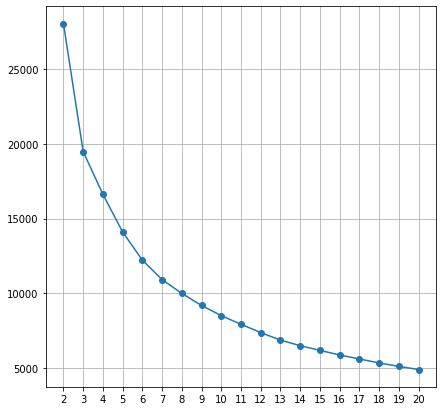

In [24]:
# definir o numero ideal do cluster
plt.figure(figsize=(7,7))
plt.plot(n_clusts, inercias, 'o-')
plt.xticks(n_clusts)
plt.grid();

- A localização de uma curva (cotovelo) na trama é geralmente considerada como um indicador do número apropriado de clusters.


- Existem quedas em 5, 6, e 7. 


- Para este estudo estamos considerando o número apropriado dentro da premissa da área de negócio cluster igual a cinco. 

## 3.04. Definir o agrupamento

In [25]:
#Definir o agrupamento em cinco grupos
n_clus = 5
km = KMeans(n_clusters=n_clus, n_init=200, max_iter=3000, random_state=61658)
km.fit(X_tr_s)

#criar um cópia
X_tr_clus = X_tr.copy()
X_ts_clus = X_ts.copy()

#juntar os dataframe
X_tr_clus = X_tr_clus.join(y_tr)
X_ts_clus = X_ts_clus.join(y_ts)

X_tr_clus.loc[:,'cluster'] = km.predict(X_tr_s)
X_ts_clus.loc[:,'cluster'] = km.predict(X_ts_s)

In [26]:
X_tr_clus

,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price,cluster
id,date,,,,,,,,,,,,,,,
7212680850,2014-09-03,3,2.50,1730,6930,2.0,0,0,3,8,1730,1994,1780,6930,258000.0,4
3528000140,2014-10-23,4,2.50,3720,30649,2.0,0,0,3,10,3720,1988,3220,29434,899000.0,2
7697800040,2014-08-26,4,2.75,2150,9820,1.0,0,0,4,8,1220,1979,2060,9830,470000.0,4
7979900215,2014-06-11,3,1.50,1460,11407,1.0,0,0,3,7,1460,1954,1470,11407,381000.0,0
420069021,2014-10-27,3,2.00,1990,203861,1.0,0,0,3,7,1990,1949,2760,217800,246000.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162100650,2014-09-22,4,2.50,2320,7379,2.0,0,0,3,8,2320,1987,2230,7614,316000.0,1
1150000740,2014-10-03,4,2.50,1990,8034,2.0,0,0,4,10,1990,1989,2580,8034,639000.0,1
301401620,2014-10-15,3,2.50,1852,4000,2.0,0,0,3,7,1852,2014,2475,4000,298900.0,4


# 4.0 Passo 04 - Caracterização dos Grupos

## 4.01.Interpretar os clusters

In [27]:
# função de interpretar os clusters
def q05(grp):
    return grp.quantile(0.05)
def q95(grp):
    return grp.quantile(0.95)

X_ts_clus.groupby('cluster')[sel_cols+['price']].agg([q05, 'median', q95])

grade              sqft_living                 yr_built          \
          q05 median   q95         q05  median     q95      q05  median   
cluster                                                                   
0         6.0    7.0   7.0       740.0  1260.0  1840.0   1908.0  1944.5   
1         8.0    9.0  10.0      2090.0  2650.0  3460.0   1974.0  1998.0   
2         9.0   10.0  12.0      3100.0  3920.0  6050.0   1952.9  1996.0   
3         7.0    8.0   9.0      1691.0  2270.0  3438.0   1906.1  1953.0   
4         7.0    7.0   8.0      1090.0  1690.0  2300.0   1967.0  1987.5   

                     price                        
             q95       q05     median        q95  
cluster                                           
0        1964.00  166855.0   350000.0   677150.0  
1        2014.00  330000.0   590000.0   992300.0  
2        2013.00  574000.0  1049990.0  2705000.0  
3        1967.00  279100.0   607000.0  1288100.0  
4        2009.75  219237.5   360000.0   605000.0

Faixas contendo 90% dos imóveis de cada cluster:

 **- Cluster 0: Imóveis antigo em conta**                                      
  - grade       de 6.0  à  7.0 
  - sqft_living de 740.0  à  1840.0
  - yr_built    de 1908.0  à  1964.0
  - price       de 166855.0  à  677150.0
  
    
**- Cluster 1: Imóveis novo intermediário**
  - grade       de 8.0  à  10.0 
  - sqft_living de 2090.0  à  3460.0
  - yr_built    de 1974.0  à  2014.0
  - price       de 330000.0  à  992300.0
  
    
 **-Cluster 2: Imóveis grande estiloso** 
  - grade       de 9.0  à  12.0 
  - sqft_living de 3100.0  à  6050.0
  - yr_built    de 1952.9  à  2013.0
  - price       de 574000.0  à  2705000.0
  
    
 **-Cluster 3: Imóveis antigo intermediário** 
  - grade       de 7.0  à  9.0 
  - sqft_living de 1691.0  à  3438.0
  - yr_built    de 1906.1  à  1967.0
  - price       de 279100.0  à  1288100.0
  
  
**-Cluster 4:  Imóveis novo em conta** 
  - grade       de 7.0  à  8.0 
  - sqft_living de 1090.0  à  2300.0
  - yr_built    de 1967.0  à  2009.75
  - price       de 219237.5  à  605000.0
  
 

## 4.02.Verificar a quantidade de imóveis 

In [28]:
#verificar a quantidade de imóveis em cada agrupamento dos dados de teste
X_ts_clus.cluster.value_counts()

4    1706
0    1340
1    1076
3     863
2     419
Name: cluster, dtype: int64

## 4.03.Verificar a faixa de preço dos imóveis 

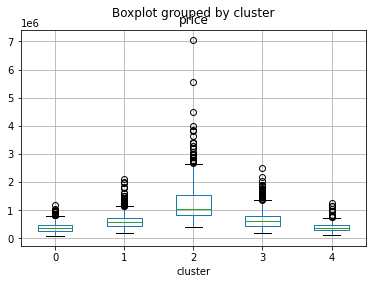

In [29]:
#Verificar a faixa de preço dos imóveis por agrupamento dos dados de teste
X_ts_clus.boxplot(column='price', by = 'cluster')

(0.0, 2000000.0)

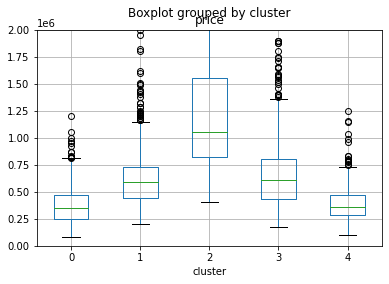

In [30]:
X_ts_clus.boxplot(column='price', by = 'cluster')
plt.ylim((0,2e6))

## 4.04.Verificar a média de notas dos imóveis 

In [31]:
#Verificar a media de notas dos imóveis por agrupamento dos dados de teste
X_ts_clus.groupby('cluster').grade.mean()

cluster
0     6.559701
1     8.563197
2    10.190931
3     7.703360
4     7.337632
Name: grade, dtype: float64

## 4.05.Verificar a mediana de notas dos imóveis 

In [32]:
#Verificar a mediana de notas dos imóveis por agrupamento dos dados de teste
X_ts_clus.groupby('cluster').grade.median()

cluster
0     7.0
1     9.0
2    10.0
3     8.0
4     7.0
Name: grade, dtype: float64

## 4.06.Verificar a faixa de área interna acima do solo dos imóveis 

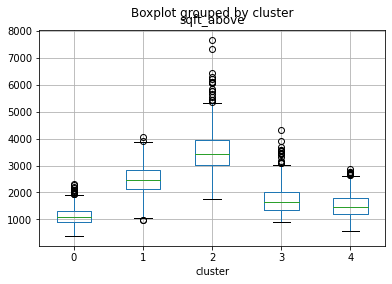

In [33]:
#Verificar a faixa de area interna acima do solo dos imóveis por agrupamento dos dados de teste
X_ts_clus.boxplot(column='sqft_above', by = 'cluster')

In [34]:
X_tr_clus

,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price,cluster
id,date,,,,,,,,,,,,,,,
7212680850,2014-09-03,3,2.50,1730,6930,2.0,0,0,3,8,1730,1994,1780,6930,258000.0,4
3528000140,2014-10-23,4,2.50,3720,30649,2.0,0,0,3,10,3720,1988,3220,29434,899000.0,2
7697800040,2014-08-26,4,2.75,2150,9820,1.0,0,0,4,8,1220,1979,2060,9830,470000.0,4
7979900215,2014-06-11,3,1.50,1460,11407,1.0,0,0,3,7,1460,1954,1470,11407,381000.0,0
420069021,2014-10-27,3,2.00,1990,203861,1.0,0,0,3,7,1990,1949,2760,217800,246000.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162100650,2014-09-22,4,2.50,2320,7379,2.0,0,0,3,8,2320,1987,2230,7614,316000.0,1
1150000740,2014-10-03,4,2.50,1990,8034,2.0,0,0,4,10,1990,1989,2580,8034,639000.0,1
301401620,2014-10-15,3,2.50,1852,4000,2.0,0,0,3,7,1852,2014,2475,4000,298900.0,4


# 5.0 Passo 05 - Aplicação de Negócio

- Para a área de negócios iremos apresentar através de fichas contendo os ranges de cada variáveis por agrupamento.

## 5.01.Fichas

In [35]:
from IPython.display import Image

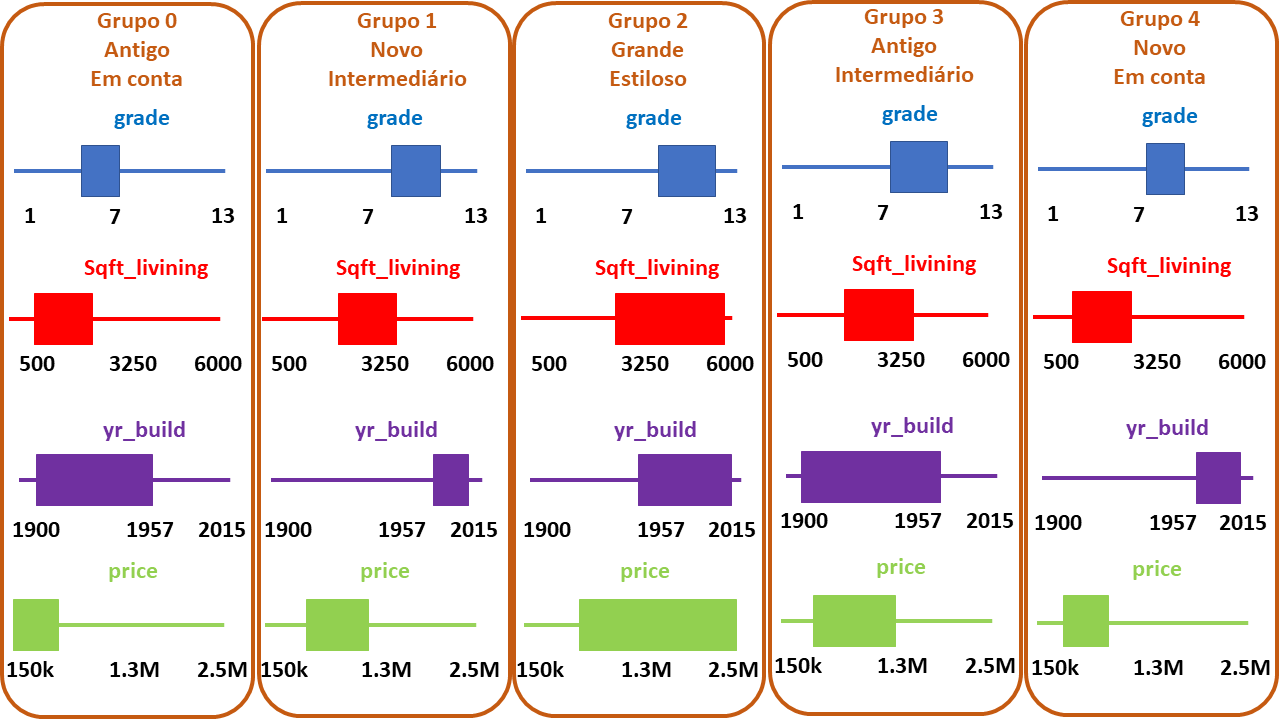

In [36]:
PATH = (r'/content/cluster_fichas.png')
Image( filename = PATH, width=1280, height=720)